In [35]:
# Add path to src/CARPy, in case notebook is running locally
import os, sys, warnings
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..\\..\\..\\..\\src")))
warnings.simplefilter("ignore")  # <-- Suppress warnings

import pandas as pd

excel_path = os.path.join(os.getcwd(), "..\\..\\..\\..\\src\\carpy\\propulsion\\data\\cyclinganalytics_power.xlsx")

dfs = pd.read_excel(excel_path, sheet_name=None)

Import time to exhaustion data

In [37]:
import pandas as pd

excel_path = os.path.join(os.getcwd(), "..\\..\\..\\..\\src\\carpy\\propulsion\\data\\cycling_exhaustion_malewicki.xlsx")

dfs = pd.read_excel(excel_path, sheet_name=None)

Create power models

In [142]:
import numpy as np
from carpy.utility import Quantity
from scipy.optimize import curve_fit

def func(x, a, b, c):
    """Exponential model with controlling parameters a, b, and c."""
    return a * np.exp(-b * x) + c

# Model parameters for a healthy human's sustained power output
popt_healthy, _ = curve_fit(
    func,
    dfs["healthy"]["power [hp]"],
    dfs["healthy"]["time [hr]"],
)

# Model parameters for an athlete's sustained power output
popt_athlete, _ = curve_fit(
    func,
    dfs["athlete"]["power [hp]"],
    dfs["athlete"]["time [hr]"],
)

# Model generation seems quite sensitive to the scale of the input data.
# Default guess for p0=(1,1,1) seems fine when data is in horsepower and hours.

Visualise the chart to make sure our models make sense

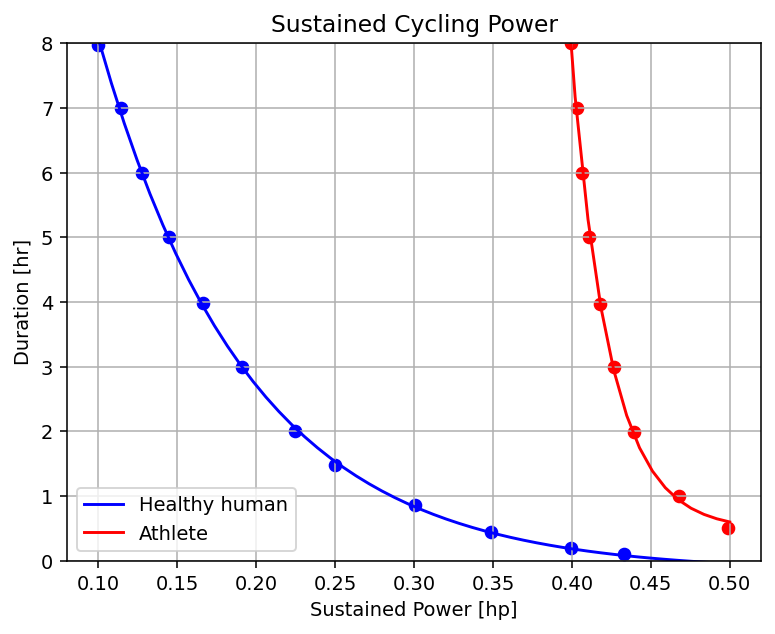

In [144]:
power = np.linspace(0.1, 0.5)
time_healthy = func(power, *popt_healthy)
time_athlete = func(power, *popt_athlete)

from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, dpi=140)

# Plot raw data
ax.scatter(dfs["healthy"]["power [hp]"], dfs["healthy"]["time [hr]"], c="blue")
ax.scatter(dfs["athlete"]["power [hp]"], dfs["athlete"]["time [hr]"], c="red")

# Plot models
ax.plot(power, time_healthy, c="blue", label="Healthy human")
ax.plot(power, time_athlete, c="red", label="Athlete")

ax.set_ylim(0, 8)
ax.set_title("Sustained Cycling Power")
ax.set_xlabel("Sustained Power [hp]")
ax.set_ylabel("Duration [hr]")
ax.legend()
ax.grid()
plt.show()


Work out the times that it would take to cross the channel at the shortest point, with no wind

In [151]:
channel_dist = Quantity(20.5, "mi")
crossing_speeds = Quantity(np.linspace(0, 15), "m s^{-1}")

crossing_times = channel_dist / crossing_speeds

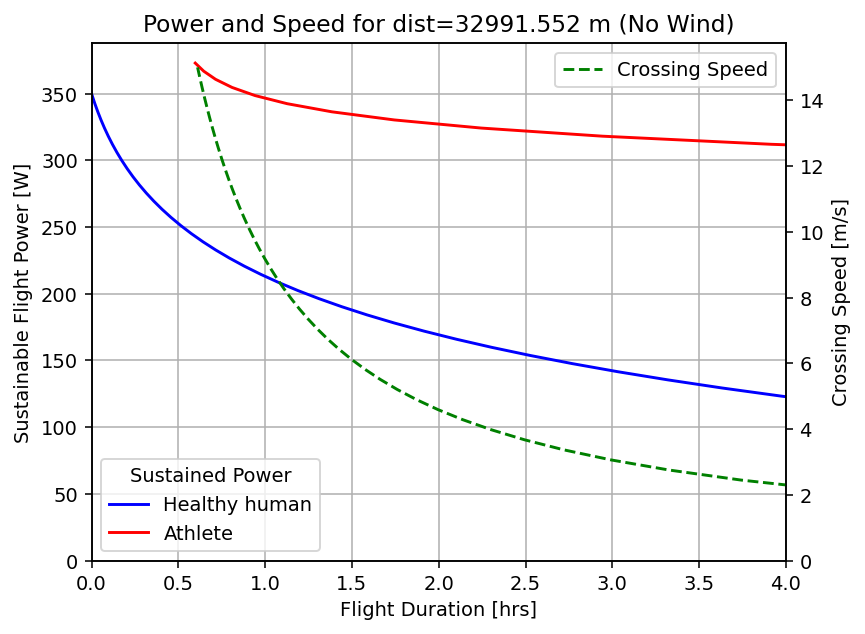

In [167]:
fig, ax = plt.subplots(1, dpi=140)
ax2 = ax.twinx()

ax.plot(time_healthy, Quantity(power, "hp").to("W"), c="blue", label="Healthy human")
ax.plot(time_athlete, Quantity(power, "hp").to("W"), c="red", label="Athlete")

ax2.plot(crossing_times.to("hr"), crossing_speeds, ls="--", c="green", label="Crossing Speed")

ax.set_xlim(0, 4)
ax.set_ylim(0, None)
ax2.set_ylim(0, None)
ax.set_title(f"Power and Speed for dist={channel_dist} (No Wind)")
ax.set_xlabel("Flight Duration [hrs]")
ax.set_ylabel("Sustainable Flight Power [W]")
ax2.set_ylabel("Crossing Speed [m/s]")

ax.legend(title="Sustained Power", loc="lower left")
ax2.legend(loc="upper right")
ax.grid()
plt.show()